In [1]:
#load the libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import tree

In [2]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


# EDA

In [3]:
data = pd.read_csv("Company_Data.csv")

In [4]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
#Data Structure 
data.shape

(400, 11)

In [6]:
#data types
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
company = encoder.fit_transform(data)

In [11]:
company_val = []
for value in data["Sales"]:
     if value<=7.49:
        company_val.append("low")
     else:
        company_val.append("high")

company["company_val"]= company_val

In [12]:
company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
5,10.81,124,113,13,501,72,1,78,16,2,1,high
6,6.63,115,105,0,45,108,3,71,15,1,2,low
7,11.85,136,81,15,425,120,2,67,10,1,1,high
8,6.54,132,110,0,108,124,3,76,10,2,2,low
9,4.69,132,113,0,131,124,3,76,17,2,1,low


In [13]:
x = company.drop(['company_val','Sales'], axis =1)
y = company['company_val']

In [14]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [15]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: company_val, Length: 400, dtype: object

In [16]:
company['company_val'].unique()

array(['high', 'low'], dtype=object)

In [17]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'company_val']

In [18]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [19]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
85,125,103,0,304,112,3,49,13,2,2
69,127,59,0,339,99,3,65,12,1,2
203,131,82,0,132,157,1,25,14,1,2
379,125,111,0,404,107,1,54,15,1,2
261,121,42,4,188,118,3,54,15,1,1
...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,3,48,12,1,1
165,147,58,7,100,191,1,27,15,1,1
7,136,81,15,425,120,2,67,10,1,1
219,116,79,19,359,116,2,58,17,1,1


In [20]:
y_train

85     high
69     high
203     low
379     low
261     low
       ... 
306     low
165     low
7      high
219    high
326     low
Name: company_val, Length: 320, dtype: object

# Building Decision Tree Classifier using Entropy Criteria

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy' ,max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
#Predicting on test data
pred_test1 = model.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 68.75
Train data Accuracy is: 73.4375


In [23]:
model1 = DecisionTreeClassifier(criterion = 'entropy' ,max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 67.5
Train data Accuracy is: 78.4375


In [25]:
model2 = DecisionTreeClassifier(criterion = 'entropy' ,max_depth=6)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [26]:
#Predicting on test data
pred_test1 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 62.5
Train data Accuracy is: 90.625


In [27]:
model3 = DecisionTreeClassifier(criterion = 'entropy' ,max_depth=7)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [28]:
#Predicting on test data
pred_test1 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 66.25
Train data Accuracy is: 91.875


In [29]:
model4 = DecisionTreeClassifier(criterion = 'entropy' ,max_depth=7)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [30]:
#Predicting on test data
pred_test1 = model4.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model4.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 66.25
Train data Accuracy is: 91.875


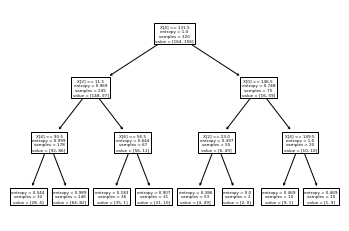

<Figure size 14400x7200 with 0 Axes>

In [54]:
#PLot the decision tree
tree.plot_tree(model);
fig = plt.figure(figsize=(200,100))

In [32]:
y_train.value_counts()

high    164
low     156
Name: company_val, dtype: int64

<Figure size 14400x7200 with 0 Axes>

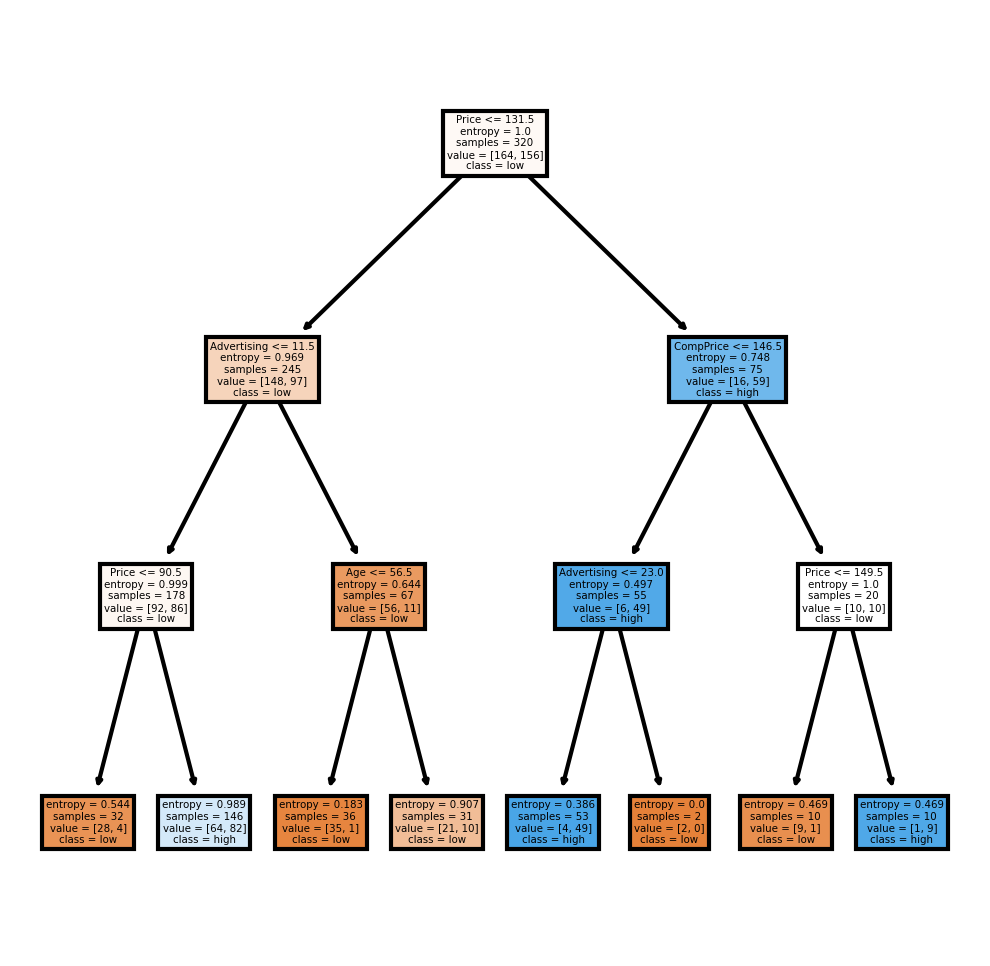

In [55]:
fig = plt.figure(figsize=(200,100))
fn=['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US']
cn=['low', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.savefig('DT_Entropy.pdf')

In [34]:
pred_train = model4.predict(x_train)

In [35]:
#Predicting on test data
preds = model4.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

low     48
high    32
dtype: int64

In [36]:
y_test

132    high
390     low
310    high
3       low
248     low
       ... 
361    high
197     low
23      low
54      low
58      low
Name: company_val, Length: 80, dtype: object

In [37]:
preds

array(['low', 'low', 'high', 'low', 'low', 'high', 'high', 'high', 'high',
       'high', 'low', 'low', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'high', 'high', 'low', 'low', 'high', 'high', 'low',
       'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'low', 'high', 'low', 'high', 'low', 'high', 'low', 'low', 'low',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'high'],
      dtype=object)

In [38]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,high,low
company_val,,
high,20,15
low,12,33


In [39]:
# Accuracy 
np.mean(preds==y_test)

0.6625

# Building Decision Tree Classifier (CART) using Gini Criteria

In [40]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [41]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
#Predicting on test data
pred_testg1 = model_gini.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test)*100)
#Predicting on train data
pred_traing1 = model_gini.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train)*100)

Test data Accuracy is: 71.25
Train data Accuracy is: 77.5


In [43]:
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [44]:
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test)*100)
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train)*100)

Test data Accuracy is: 66.25
Train data Accuracy is: 82.1875


In [45]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [46]:
#Predicting on test data
pred_testg1 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test)*100)
#Predicting on train data
pred_traing1 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train)*100)

Test data Accuracy is: 72.5
Train data Accuracy is: 88.75


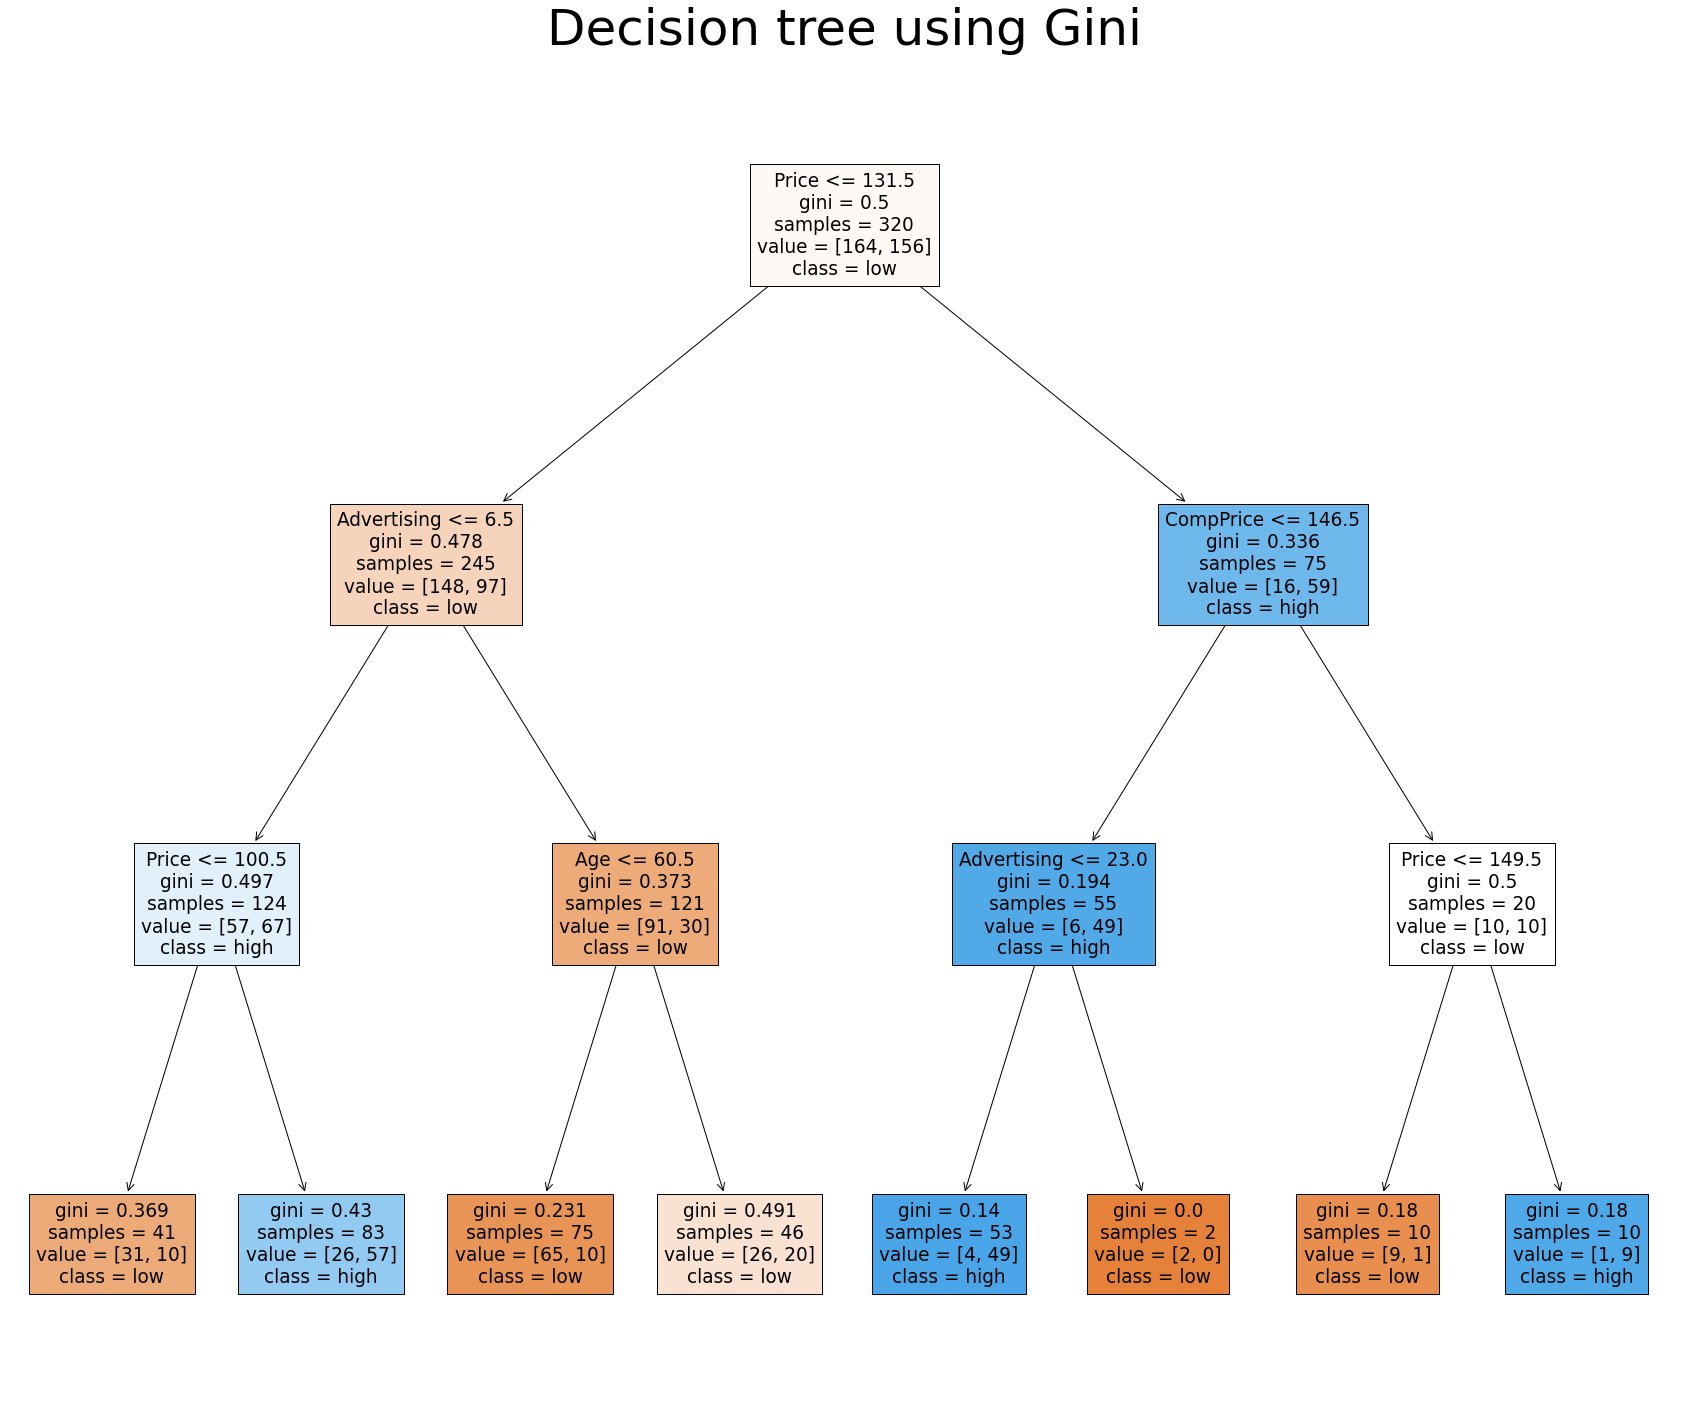

In [56]:
# let's plot the decision tree
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=50)
plt.savefig('DT_Gini.pdf')

In [48]:
preds = model_gini2.predict(x_test)
pd.Series(preds).value_counts()

low     43
high    37
dtype: int64

In [49]:
preds

array(['low', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'low', 'low', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'low',
       'low', 'low'], dtype=object)

In [50]:
pd.crosstab(y_test,preds)

col_0,high,low
company_val,,
high,25,10
low,12,33


In [51]:
np.mean(preds==y_test)*100

72.5

Classification Report                precision    recall  f1-score   support

        high       0.68      0.71      0.69        35
         low       0.77      0.73      0.75        45

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.73      0.72      0.73        80



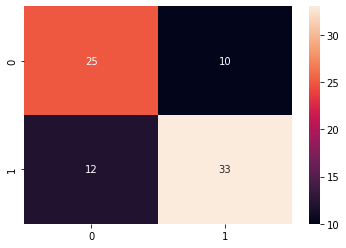

In [52]:

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, preds),annot=True,fmt = "d")
print('Classification Report ',classification_report(y_test,preds))